In [1]:
import tensorflow as tf
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt

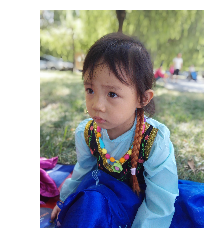

(3264, 2448, 3)


In [2]:
myimg = mpimg.imread('img.jpg')
plt.imshow(myimg)
plt.axis('off')
plt.show()
print (myimg.shape)

In [13]:
full = np.reshape(myimg,[1,3264, 2448, 3])
inputfull = tf.Variable(tf.constant(1.0,shape=[1,3264, 2448, 3]))
filter = tf.Variable(tf.constant([[-1.0,-1.0,-1.0],[0,0,0],[1.0,1.0,1.0],
                                  [-2.0,-2.0,-2.0],[0,0,0],[2.0,2.0,2.0],
                                 [-1.0,-1.0,-1.0],[0,0,0],[1.0,1.0,1.0]],shape=[3,3,3,1]))
op = tf.nn.conv2d(inputfull,filter,strides=[1,1,1,1],padding='SAME')
o = tf.cast(((op-tf.reduce_min(op))/(tf.reduce_max(op)-tf.reduce_min(op)))*255,tf.uint8)

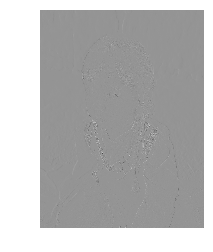

In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    t,f = sess.run([o,filter],feed_dict={inputfull:full})
    t = np.reshape(t,[3264,2448])
    plt.imshow(t,cmap='Greys_r')#显示图片
    plt.axis('off')
    plt.show()